In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Math
from IPython.display import Markdown




At both Sets X_Train and X_Test

In [28]:
# Look for the true path toward in your computer toward data and name the Dataset - HeartDisease.csv for it to work
HearDisease_csv = pd.read_csv('/home/tareqrazik/Downloads/HeartDisease.csv')

X_train, X_test= train_test_split(HearDisease_csv, test_size=0.75,random_state=1948)

#The purpose is to keep all X_train , X_test split in order to make DataCleaning as clean as possible
#Note : since Our Dataset is too Big , making test_size = 0.75 will help our computers in model tuning
#Note : this needs to change at the end , since its not optimal yet it won't have an effect on our visulization
y_train ,y_test = X_train.pop('Heart_Disease') , X_test.pop('Heart_Disease')

y_train , y_test = y_train.map({'Yes':True ,'No':False}) , y_test.map({'Yes':True,'No':False})
# Drop Our Target_Variables in addition to applying nesseary transformations

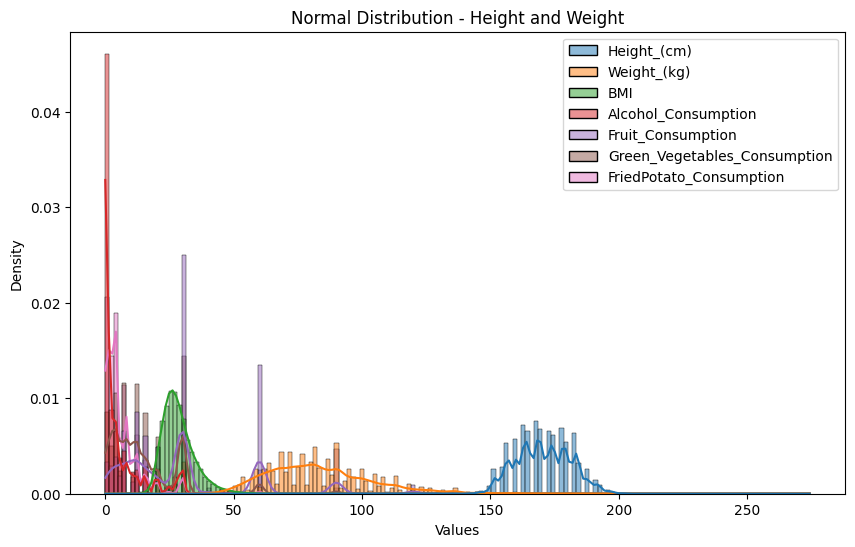

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(X_train, kde=True, stat='density')
plt.ylabel('Density')
plt.title('Normal Distribution - Height and Weight')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

In [30]:
from IPython.display import Math


height_mean ,height_std = int(X_train['Height_(cm)'].mean()) , int(X_train['Height_(cm)'].std())

weight_mean ,weight_std = int(X_train['Weight_(kg)'].mean()) , int(X_train['Weight_(kg)'].std())

In [31]:
display(
    Markdown("### Feature Distributions"),
    
    Markdown("The training data shows the Height normally distrbuted:"),
    Math(fr'Height \sim \mathcal{{N}}(\mu = {height_mean},\,\sigma= {height_std})'),
)

display(
    Markdown("The training data shows the Weight normally distrbuted:"),
    Math(fr'Height \sim \mathcal{{N}}(\mu = {weight_mean},\,\sigma= {weight_std})'),
    Markdown("Confirming Our dataset Quality due to it matching our Expectation on Height and Weight Distrbutions in adult humans")
)

#Note , This relates to the part of clinical plausability explained in Evaluation by our Data Analysis Specialist Mr Andrei
#Note , another Observation we can make is Weight_Std > Height_Std this also matches our expectation since usualy humans tend to have greater difference in Weight than Hieght
#Note , Also Its shown by the Graph above where you can see the Yellow line more flat than Blue 

### Feature Distributions

The training data shows the Height normally distrbuted:

<IPython.core.display.Math object>

The training data shows the Weight normally distrbuted:

<IPython.core.display.Math object>

Confirming Our dataset Quality due to it matching our Expectation on Height and Weight Distrbutions in adult humans

<Figure size 1000x600 with 0 Axes>

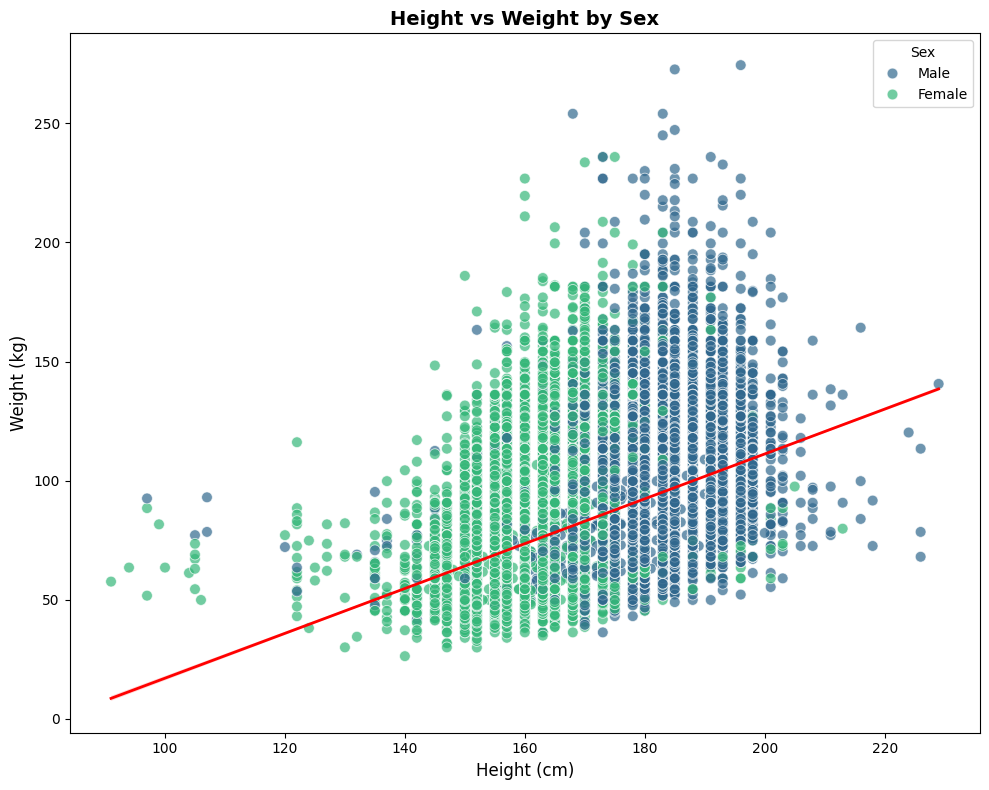

In [32]:
plt.figure(figsize=(10, 6))

df = pd.DataFrame(X_train, columns=['Height_(cm)', 'Weight_(kg)'])
df['Sex'] = X_train['Sex']  

# Plot with seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Height_(cm)', y='Weight_(kg)', hue='Sex',  
                palette='viridis', s=60, alpha=0.7)

sns.regplot(data=df, x='Height_(cm)', y='Weight_(kg)', 
            scatter=False, 
            line_kws={'color': 'red', 'linewidth': 2, 'label': 'Regression Line'})
plt.xlabel('Height (cm)', fontsize=12)
plt.ylabel('Weight (kg)', fontsize=12)
plt.title('Height vs Weight by Sex', fontsize=14, fontweight='bold')  # Updated title
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

Our analysis reveals an intuitive yet important pattern: weight increases linearly with height in addition due to males being taller most males tend to have higer wegihts . This relationship validates basic expectations and also confirms the quality  of our collected data.